## Setup

### Import libraries

In [18]:
import tensorflow as tf
from common import *
import matplotlib.pyplot as plt
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#     # RIP Training time
#     raise SystemError('GPU device not found')
#     print('Found GPU at: {}'.format(device_name))

### Extract zip

In [4]:
TRAIN_DATA_ZIP_PATH = "data/training_data.zip"

In [5]:
import zipfile
with zipfile.ZipFile(TRAIN_DATA_ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall("vietnamese_hcr/raw")

### Constants

In [5]:
import pathlib
# finding where we are so we dont need to type absolute path everytime
current_directory_path = pathlib.Path("./vietnamese_hcr").absolute()
current_directory_path

WindowsPath('c:/backup/data/AI Hota/BKAI/Vietnamese Handwritten Text Recognition/vietnamese_hcr')

In [6]:
import os
# path to our directory images

# our train and test folder (not used for now but used later when we want to save images after processing)
DATA_PATH = os.path.join(str(current_directory_path), "data")
TEST_FOLDER = os.path.join(DATA_PATH, "test")
TRAIN_FOLDER = os.path.join(DATA_PATH, "train")

# our raw folders
RAW_FOLDER = os.path.join(str(current_directory_path),"raw")
RAW_DATA_FOLDER = os.path.join(RAW_FOLDER,"data")

# label json files
LABEL_PATH = os.path.join(RAW_FOLDER, "labels.txt")

In [7]:
if not os.path.exists(TEST_FOLDER):
    os.makedirs(TEST_FOLDER)
if not os.path.exists(TRAIN_FOLDER):
    os.makedirs(TRAIN_FOLDER)

### Preprocessing labels

In [8]:
Label_data = []
# open these raw label files
with open(LABEL_PATH, 'r', encoding='utf8') as f:
    s = f.read()
    Label_data = s.split('\n')

In [9]:
for i in range(len(Label_data)):
    obj = Label_data[i].split('\t')
    Label_data[i] = {
        'name': obj[0],
        'text': obj[1]
    }

In [10]:
Label_data

[{'name': 'train_img_0.jpg', 'text': 'Thỗn'},
 {'name': 'train_img_1.jpg', 'text': 'May-So'},
 {'name': 'train_img_2.jpg', 'text': 'nhẹn'},
 {'name': 'train_img_3.jpg', 'text': 'hàu'},
 {'name': 'train_img_4.jpg', 'text': 'Quấy'},
 {'name': 'train_img_5.jpg', 'text': 'quầy'},
 {'name': 'train_img_6.jpg', 'text': 'TRẾNH'},
 {'name': 'train_img_7.jpg', 'text': 'Nhờm'},
 {'name': 'train_img_8.jpg', 'text': 'TỌC'},
 {'name': 'train_img_9.jpg', 'text': 'MIỆNG'},
 {'name': 'train_img_10.jpg', 'text': 'LE-VA'},
 {'name': 'train_img_11.jpg', 'text': 'ngứ'},
 {'name': 'train_img_12.jpg', 'text': 'Leninit'},
 {'name': 'train_img_13.jpg', 'text': 'Hydroponic'},
 {'name': 'train_img_14.jpg', 'text': 'TÚY'},
 {'name': 'train_img_15.jpg', 'text': 'phều'},
 {'name': 'train_img_16.jpg', 'text': 'ghiếc'},
 {'name': 'train_img_17.jpg', 'text': 'thâm'},
 {'name': 'train_img_18.jpg', 'text': 'Pai'},
 {'name': 'train_img_19.jpg', 'text': 'DẮT'},
 {'name': 'train_img_20.jpg', 'text': 'chím'},
 {'name': 'tra

### Get info from data

In [151]:
max_label_len = 0

# find the maximum label length
for label in Label_data:
    max_label_len = max(len(label['text']), max_label_len)

max_label_len

17

In [153]:
# find all characters in labels (so we don't blindly add chacters not even existed in our dataset)
char_list = set()
for label in Label_data:
    char_list.update(set(label["text"]))
char_list = sorted(char_list)
len(char_list)

187

In [156]:
# show all possible labels characters
"".join(char_list)

'-ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'

In [171]:
import numpy as np

# lists for training dataset
resize_max_width=0
i=0
for label in Label_data:
    train_img_path = os.path.join(RAW_DATA_FOLDER, label['name'])

    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    
    height, width = img.shape

    # in this dataset, we don't need to do any resize at all here.
    img = cv2.resize(img,(int(100/height*width), 100))
    
    height, width = img.shape
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))

print(resize_max_width)

has processed trained 500 files
has processed trained 1000 files
has processed trained 1500 files
has processed trained 2000 files
has processed trained 2500 files
has processed trained 3000 files
has processed trained 3500 files
has processed trained 4000 files
has processed trained 4500 files
has processed trained 5000 files
has processed trained 5500 files
has processed trained 6000 files
has processed trained 6500 files
has processed trained 7000 files
has processed trained 7500 files
has processed trained 8000 files
has processed trained 8500 files
has processed trained 9000 files
has processed trained 9500 files
has processed trained 10000 files
has processed trained 10500 files
has processed trained 11000 files
has processed trained 11500 files
has processed trained 12000 files
has processed trained 12500 files
has processed trained 13000 files
has processed trained 13500 files
has processed trained 14000 files
has processed trained 14500 files
has processed trained 15000 files


Max width image in training images is 766, so I set 800 for pertty :V
Max length label is 17, again I set 20 for pertty :V

### Testing

In [184]:
pad_listint(encodeText("hello"))

array([34, 31, 38, 38, 41,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

In [ ]:
calCER("hello", "hallo")

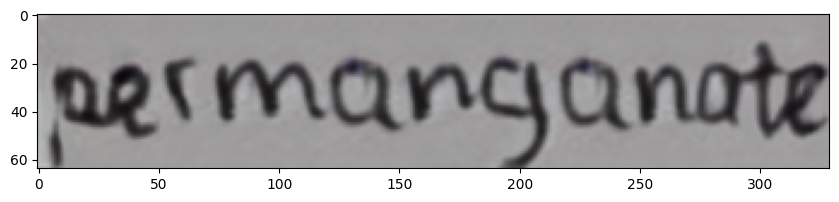

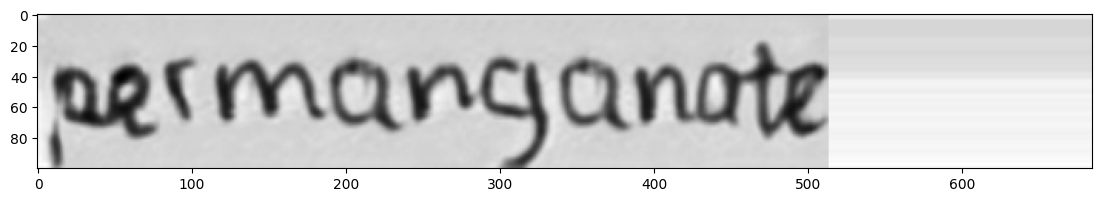

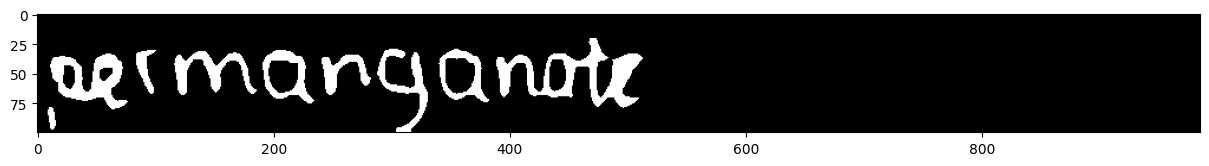

In [172]:
img = cv2.imread(os.path.join(RAW_DATA_FOLDER, Label_data[102987]['name']))
imgShow(img)

imgShow(autoResize(img))

niceImage = test_orc_preprocess(img, default_fixed_size = (800, 100), default_filter_size = (5, 5))
imgShow(niceImage)